# Designing a Flight Booking Chatbot

Last updated : November 23th, 2022 

## Introduction

The goal of this project is to build a chatbot for a turnkey flight booking company. The bot developped during this project is supposed to serve as a MVP to prove the useful net of chatbot technology for the company.

The goal of this bot is to detect 5 key information in user messages :

- Departure Date
- Return Date
- Departure City
- Arrival City
- Budget

## 1. Data Processing and Exploration.

Our dataset is extracted from the Microsoft Frames dataset. 

Let's load the packages and the dataset.

### 1.1 Loading packages

In [18]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#Setting large figure size for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":18})

### 1.2 Loading the dataset

Now we can load our dataset which is composed of a single json file.

In [12]:
data = pd.read_json('Data/frames.json')
data.head()

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


### 1.3 Data Exploration

We can see that the turns and labels columns are composed of dictionnaries. Let's investigate :

In [13]:
pd.json_normalize(data['labels'])

,userSurveyRating,wizardSurveyTaskSuccessful
0,4.0,True
1,3.0,True
2,2.0,False
3,5.0,True
4,5.0,True
...,...,...
1364,3.5,True
1365,4.5,True
1366,5.0,True
1367,4.0,True


In [14]:
data.shape

(1369, 5)

We **expand the dictionnary** by using the json_normalize function, and merge this with our base dataset :

In [15]:
df = data.drop(columns='labels').merge(pd.json_normalize(data['labels']), how='inner', left_index=True, right_index=True)
df

,user_id,turns,wizard_id,id,userSurveyRating,wizardSurveyTaskSuccessful
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,4.0,True
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,3.0,True
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,2.0,False
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,5.0,True
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,5.0,True
...,...,...,...,...,...,...
1364,U2AMZ8TLK,[{'text': 'Hi I've got 9 days free and I'm loo...,U21DMV0KA,957fd205-bb7c-4b81-8cb6-13c81c51c5c9,3.5,True
1365,U2AMZ8TLK,[{'text': 'I need to get to Fortaleza on Septe...,U260BGVS6,71b21b86-2d05-4372-a0ee-6ed64b0ddc42,4.5,True
1366,U231PNNA3,[{'text': 'We're finally going on vacation isn...,U21T9NMKM,ef2cd70e-c1f2-42be-8839-cb465af0bf41,5.0,True
1367,U2AMZ8TLK,"[{'text': 'Hi there, I'm looking for a place t...",U21DMV0KA,ffa79d2c-14eb-45e6-8573-b0817a1a1803,4.0,True


We can see that the information stored within the labels dictionnaries is composed of 2 pieces of information : 
    
- User scores
- Wizard Survey Task Successful (assessed by the bot)

Let's look at the distribution of user scores :

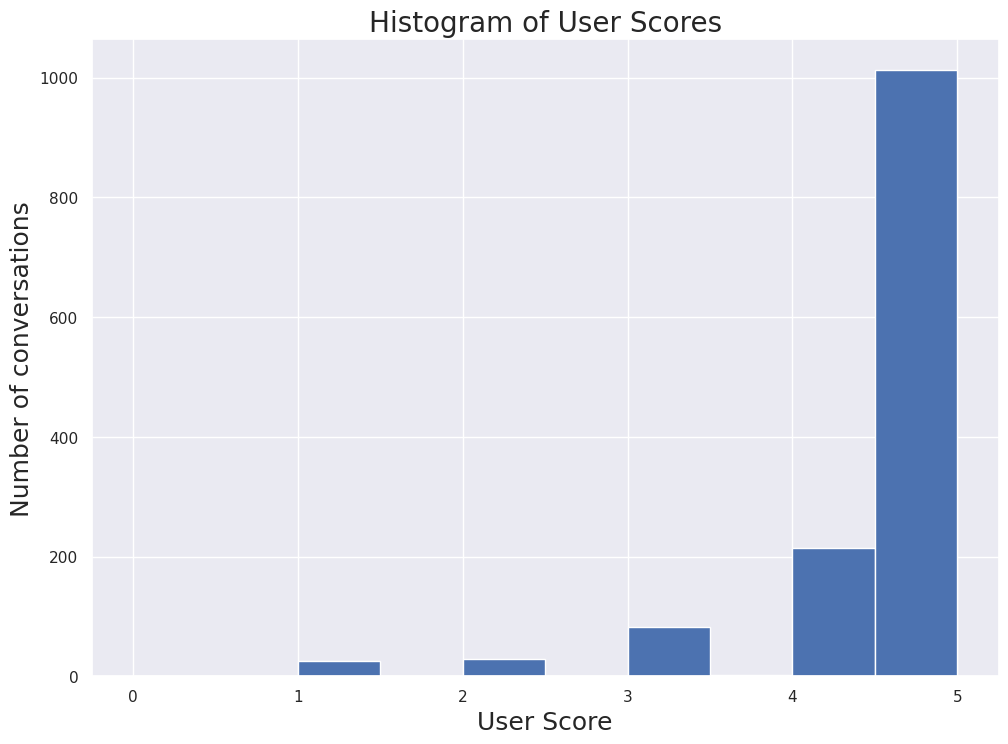

In [24]:
plt.hist(df.userSurveyRating, [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.title("Histogram of User Scores")
plt.xlabel("User Score")
plt.ylabel("Number of conversations")
plt.show()

We can see that **most scores are very good**, which is a good sign since we will be **using this data to train our LUIS language understanding model.**

Let's now look at the wizardTaskSuccessful column :

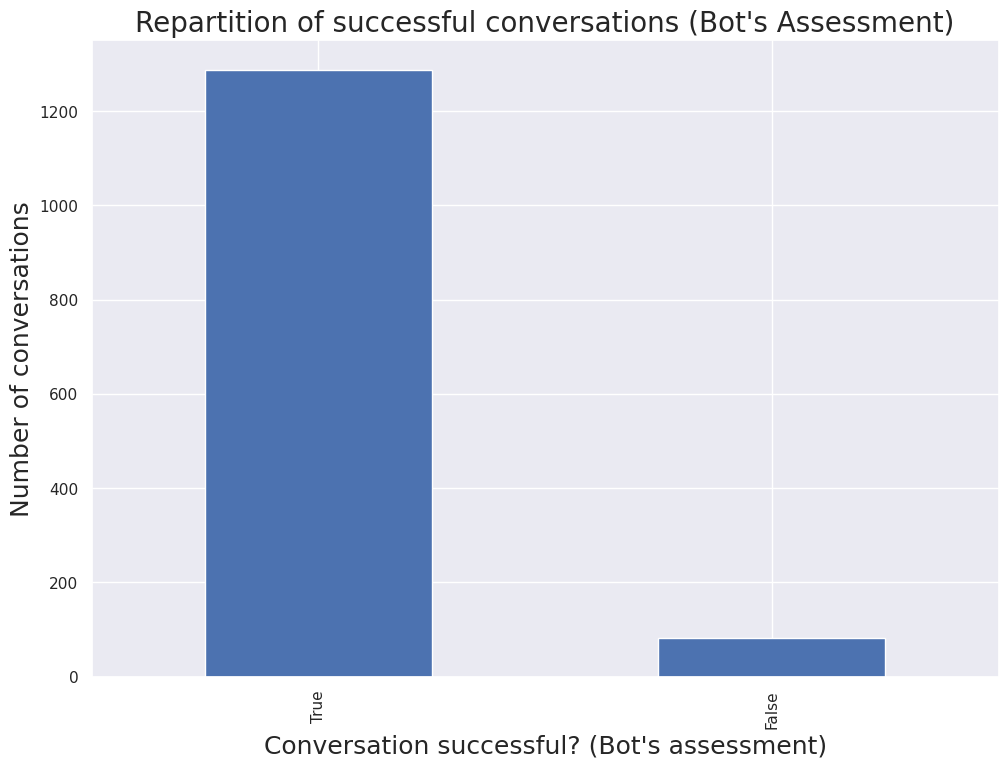

In [38]:
_df = df[['wizardSurveyTaskSuccessful']].apply(pd.value_counts)
_df.plot.bar(legend=False)
plt.title("Repartition of successful conversations (Bot's Assessment)")
plt.xlabel("Conversation successful? (Bot's assessment)")
plt.ylabel("Number of conversations")
plt.show()

In [40]:
df.wizardSurveyTaskSuccessful.value_counts(normalize=True)

True     0.940102
False    0.059898
Name: wizardSurveyTaskSuccessful, dtype: float64

The wizard assesses that **94% of the dialogs have ended successfully**.

We decide to remove columns with low user score ( < 3) and with unsuccessful dialogs. 

In [50]:
good_labels = df.loc[(df.userSurveyRating > 2) & (df.wizardSurveyTaskSuccessful==True)]

good_labels

,user_id,turns,wizard_id,id,userSurveyRating,wizardSurveyTaskSuccessful
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,4.0,True
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,3.0,True
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,5.0,True
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,5.0,True
5,U21RP4FCY,"[{'text': 'Hey, i Want to go to St. Louis on t...",U21E0179B,bbd17a54-bc6c-4237-8f72-4778081fab0c,3.0,True
...,...,...,...,...,...,...
1364,U2AMZ8TLK,[{'text': 'Hi I've got 9 days free and I'm loo...,U21DMV0KA,957fd205-bb7c-4b81-8cb6-13c81c51c5c9,3.5,True
1365,U2AMZ8TLK,[{'text': 'I need to get to Fortaleza on Septe...,U260BGVS6,71b21b86-2d05-4372-a0ee-6ed64b0ddc42,4.5,True
1366,U231PNNA3,[{'text': 'We're finally going on vacation isn...,U21T9NMKM,ef2cd70e-c1f2-42be-8839-cb465af0bf41,5.0,True
1367,U2AMZ8TLK,"[{'text': 'Hi there, I'm looking for a place t...",U21DMV0KA,ffa79d2c-14eb-45e6-8573-b0817a1a1803,4.0,True


Now we can apply the same process to the turns column : 

In [51]:
turns = pd.merge(good_labels['id'], pd.json_normalize(good_labels.turns), how='inner', left_index=True, right_index=True)

turns.set_index('id', inplace=True)

turns = pd.DataFrame(turns.stack())

turns.columns=['turn']

turns



turn
id                                                                                        
e2c0fc6c-2134-4891-8353-ef16d8412c9a 0   {'text': 'I'd like to book a trip to Atlantis ...
                                     1   {'text': 'Hi...I checked a few options for you...
                                     2   {'text': 'Yes, how about going to Neverland fr...
                                     3   {'text': 'I checked the availability for this ...
                                     4   {'text': 'I have no flexibility for dates... b...
...                                                                                    ...
e3d95337-29de-47df-bc1a-ab2aee8f64ff 7   {'text': 'Yup it's from the 12th to the 25th, ...
                                     8   {'text': 'Ok perfect, book me!', 'author': 'us...
                                     9   {'text': 'Consider it done! Have a good trip :...
                                     10  {'text': 'Thanks!', 'author': 'user', 'timesta...
                                     11  {'text': 'My pleasure!', 'author': 'wizard', '...

[16667 rows x 1 columns]

We can see after expanding the turns column that there are **multiple turns by id**.

Since we are only interested in getting entities labels from our dataset, we will only keep the turn data.

In [52]:
turns = pd.json_normalize(turns.turn)

turns

,text,author,timestamp,labels.acts,labels.acts_without_refs,labels.active_frame,labels.frames,db.result,db.search
0,I'd like to book a trip to Atlantis from Capri...,user,1.471272e+12,"[{'args': [{'val': 'book', 'key': 'intent'}], ...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",1,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN
1,"Hi...I checked a few options for you, and unfo...",wizard,1.471272e+12,"[{'args': [{'val': [{'annotations': [], 'frame...",NaN,1,"[{'info': {'intent': [{'val': 'book', 'negated...",[[{'trip': {'returning': {'duration': {'hours'...,"[{'ORIGIN_CITY': 'Porto Alegre', 'PRICE_MIN': ..."
2,"Yes, how about going to Neverland from Caprica...",user,1.471273e+12,"[{'args': [{'val': 'Neverland', 'key': 'dst_ci...","[{'args': [{'val': 'Neverland', 'key': 'dst_ci...",2,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN
3,I checked the availability for this date and t...,wizard,1.471273e+12,[{'args': [{'val': [{'annotations': [{'val': N...,NaN,2,"[{'info': {'intent': [{'val': 'book', 'negated...","[[], [], [], [], [], []]","[{'ORIGIN_CITY': 'Caprica', 'PRICE_MIN': '1700..."
4,I have no flexibility for dates... but I can l...,user,1.471273e+12,"[{'args': [{'val': False, 'key': 'flex'}], 'na...","[{'args': [{'val': False, 'key': 'flex'}], 'na...",3,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
16662,"Yup it's from the 12th to the 25th, and it wil...",wizard,1.473718e+12,"[{'args': [{'val': '12th', 'key': 'str_date'},...",NaN,2,"[{'info': {'intent': [{'val': 'book', 'negated...",[],[]
16663,"Ok perfect, book me!",user,1.473718e+12,"[{'args': [{'val': 'book', 'key': 'intent'}], ...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",2,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN
16664,Consider it done! Have a good trip :slightly_s...,wizard,1.473718e+12,"[{'args': [{'val': 'book', 'key': 'action'}], ...",NaN,2,"[{'info': {'intent': [{'val': 'book', 'negated...",[],[]
16665,Thanks!,user,1.473718e+12,"[{'args': [], 'name': 'thankyou'}]","[{'args': [], 'name': 'thankyou'}]",2,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN


Since we want to identify the sentences in **user queries**, we will **only keep user utterances**. We will also only keep the labels column which contains all the useful information. 

In [53]:
turns = turns.loc[turns.author == 'user'].copy()

turns.drop(columns=['author','timestamp','labels.active_frame',
                    'db.result','db.search','labels.acts','labels.frames'], inplace=True)

turns.columns = ['text','labels']

turns

,text,labels
0,I'd like to book a trip to Atlantis from Capri...,"[{'args': [{'val': 'book', 'key': 'intent'}], ..."
2,"Yes, how about going to Neverland from Caprica...","[{'args': [{'val': 'Neverland', 'key': 'dst_ci..."
4,I have no flexibility for dates... but I can l...,"[{'args': [{'val': False, 'key': 'flex'}], 'na..."
6,I suppose I'll speak with my husband to see if...,"[{'args': [], 'name': 'thankyou'}]"
7,"Hello, I am looking to book a vacation from Go...","[{'args': [{'val': 'book', 'key': 'intent'}], ..."
...,...,...
16657,"5 adults and 7 kids! Yup, the lot of us. We wa...","[{'args': [{'val': '5', 'key': 'n_adults'}, {'..."
16659,Oh yes! Between September 12 and 26!,"[{'args': [{'val': 'September 12', 'key': 'str..."
16661,"That sounds amazing, and it's within those dat...","[{'args': [{'val': None, 'key': 'str_date'}, {..."
16663,"Ok perfect, book me!","[{'args': [{'val': 'book', 'key': 'intent'}], ..."


Let's look at label keys :

In [54]:
keys=[]
for index, row in turns.iterrows():
    for i in range(len(row['labels'])):
        if not len(row['labels'][i]['args'])==0:
            keys.append(pd.json_normalize(row['labels'][i]['args']).key.to_list())
keys = list(np.concatenate(keys))

np.unique(keys)

array(['action', 'airport', 'amenities', 'arr_time_dst', 'arr_time_or',
       'beach', 'breakfast', 'budget', 'budget_ok', 'category',
       'cathedral', 'count', 'count_dst_city', 'count_name', 'count_seat',
       'dep_time_dst', 'dep_time_or', 'downtown', 'dst_city', 'duration',
       'end_date', 'flex', 'gst_rating', 'impl_anaphora', 'intent',
       'intent_ok', 'mall', 'market', 'max_duration', 'min_duration',
       'museum', 'n_adults', 'n_adults_ok', 'n_children', 'name',
       'or_city', 'palace', 'park', 'parking', 'price', 'ref_anaphora',
       'seat', 'seat_ok', 'shopping', 'spa', 'str_date', 'university',
       'vicinity', 'wifi'], dtype='<U14')

We identifiy the name of our **5 requested entities: budget, dst_city, or_city, str_date and end_date**

In [9]:
relevant_entities = ['budget','dst_city','or_city','str_date','end_date']

Let's now look at the **intent names :**

In [56]:
names=[]
for index, row in turns.iterrows():
    for i in range(len(row['labels'])):
        if not len(row['labels'][i]['name'])==0:
            names.append(row['labels'][i]['name'])


np.unique(names)

array(['affirm', 'confirm', 'goodbye', 'greeting', 'inform', 'moreinfo',
       'negate', 'request', 'request_alts', 'request_compare',
       'switch_frame', 'thankyou'], dtype='<U15')

For the purpose of this project, the only intent we will be interested in is the **negate intent** since it outlines entities that the **user wants to remove**.

We will remove utterances with this intent label from our dataset.

## 2. JSON Utterances generation

We have to define 3 functions for the same task but with different format :

- generate_utterances : is used to generate utterances for the Cognitive service API (not used for the rest of this project)
- generate_test_utterances : is used to generate test utterances that will then be uploaded onto the luis.ai webpage
- generate_luis_utterances : is used to generate train utterances that will then be imported with the API to our model.

### 2.1 Defining Generation functions

In [93]:
import re
def generate_utterances(df: pd.DataFrame):
    utterances = []
    for index, row in df.iterrows():
        #Replacing dollars with euros to prevent matching errors
        t = row['text'].replace("$", "€").lower()
        entities = []
        for i in range(len(row['labels'])):
            if not len(row['labels'][i]['args'])==0:
                if not row['labels'][i]['name'] == 'negate':
                    x = pd.json_normalize(row['labels'][i]['args'])
                    for ix, r in x.iterrows():
                        if np.isin(r['key'], relevant_entities):
                            #-1 signified flexiblity, but LUIS is not able to process that
                            if (r['val'] is not None) & (r['val'] != "-1"):
                                #Replacing dollar signs with euros and using lowercase
                                m = next((x for x in re.finditer(r'%s'%(r['val'].replace("$","€").lower()), t)),None)
                                if m:
                                    span = m.span()
                                    entities.append({'category': r['key'], 'offset': span[0], 'length': span[1]-span[0]})
                                else:
                                    print('No valid match for text : ')
                                    print(t)
                                    print('And parameters : ')
                                    print('Category : {}, value: {}'.format(r['key'], r['val']))
                                    
        if len(entities)==0:
            utterances.append({'intent': 'None',
                               'language': 'en-us',
                               'text': t,
                               'entities':[]
                              })
        else:
            utterances.append({'intent': 'BookFlight',
                               'language': 'en-us',
                               'text': t,
                               'entities': entities
                              })
    return utterances

In [154]:
import re
def generate_test_utterances(df: pd.DataFrame):
    utterances = []
    for index, row in df.iterrows():
        #Replacing dollars with euros to prevent matching errors
        t = row['text'].replace("$", "€").lower()
        entities = []
        for i in range(len(row['labels'])):
            if not len(row['labels'][i]['args'])==0:
                if not row['labels'][i]['name'] == 'negate':
                    x = pd.json_normalize(row['labels'][i]['args'])
                    for ix, r in x.iterrows():
                        if np.isin(r['key'], relevant_entities):
                            #-1 signified flexiblity, but LUIS is not able to process that
                            if (r['val'] is not None) & (r['val'] != "-1"):
                                #Replacing dollar signs with euros and using lowercase
                                m = next((x for x in re.finditer(r'%s'%(r['val'].replace("$","€").lower()), t)),None)
                                if m:
                                    span = m.span()
                                    entities.append({'entity': r['key'], 'startPos': span[0], 'endPos': span[1]})
                                else:
                                    print('No valid match for text : ')
                                    print(t)
                                    print('And parameters : ')
                                    print('Category : {}, value: {}'.format(r['key'], r['val']))
  
        if len(entities)==0:
            utterances.append({'intent': 'None',
                               'text': t,
                               'entities':[]
                              })
        else:
            utterances.append({'intent': 'BookFlight',
                               'text': t,
                               'entities': entities
                              })
    return utterances

In [94]:
import re
def generate_luis_utterances(df: pd.DataFrame):
    utterances = []
    for index, row in df.iterrows():
        #Replacing dollars with euros to prevent matching errors and turning the text to lowercase
        t = row['text'].replace("$","€").lower()
        entities = []
        for i in range(len(row['labels'])):
            if not len(row['labels'][i]['args'])==0:
                if not row['labels'][i]['name'] == 'negate':
                    x = pd.json_normalize(row['labels'][i]['args'])
                    for ix, r in x.iterrows():
                        if np.isin(r['key'], relevant_entities):
                            if (r['val'] is not None) & (r['val'] != "-1"):
                                #Replacing dollar signs with euros and using lowercase
                                m = next((x for x in re.finditer(r'%s'%(r['val'].replace("$","€").lower()), t)),None)
                                if m:
                                    span = m.span()
                                    entities.append({'entityName': r['key'], 'startCharIndex': span[0], 'endCharIndex': span[1]})
                                else:
                                    print('No valid match for text : ')
                                    print(t)
                                    print('And parameters : ')
                                    print('Category : {}, value: {}'.format(r['key'], r['val']))

        if len(entities)==0:
            utterances.append({'intentName': 'None',
                               'text': t,
                               'entityLabels':[]
                              })
        else:
            utterances.append({'intentName': 'BookFlight',
                               'text': t,
                               'entityLabels': entities
                              })
    return utterances

### 2.2 Generating train utterances

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(turns, test_size=0.2, random_state=5420, shuffle=True)

print(X_train.shape, X_test.shape)

(6940, 2) (1736, 2)


In [42]:
train_luis_utterances = generate_luis_utterances(X_train)

In [99]:
#Removing duplicate utterances which aren't allowed
train_utterances = pd.DataFrame(train_utterances)
train_utterances = train_utterances.loc[~train_utterances.text.duplicated(keep='first')]

In [96]:
train_luis_utterances = pd.DataFrame(train_luis_utterances)
train_luis_utterances = train_luis_utterances.loc[~train_luis_utterances.text.duplicated(keep='first')]


#Saving utterances
import json
with open('train_luis_utterances.json','w') as file:
    file.write(train_luis_utterances.to_json(orient='records'))

## 3. Model creation and training with the Azure SDK

### 3.1 Creating the application

First we have to load the credentials from our cred.py file (that has been git-ignored).

In [1]:
import os
from azure.core.credentials import AzureKeyCredential
from azure.ai.language.conversations import ConversationAnalysisClient
import cred

# get secrets
clu_endpoint = cred.endpoint
clu_key = cred.credential
project_name = cred.project_name
deployment_name = cred.deployment_name
luis_key = cred.luis_key



Now we can create a **LUIS Authoring Client instance** :

In [4]:
from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from azure.cognitiveservices.language.luis.authoring.models import ApplicationCreateObject
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials
from functools import reduce
import cred

import json, time, uuid

authoring_key = cred.luis_key
authoring_endpoint = cred.luis_endpoint

client = LUISAuthoringClient(authoring_endpoint, CognitiveServicesCredentials(authoring_key))

client

Defining the **app creation function** : 

In [139]:
def create_app():
# Create a new LUIS app
    app_name    = "Flybot"
    app_desc    = "LUIS application for integration with Chat Bot."
    app_version = "0.1"
    app_locale  = "en-us"

    app_id = client.apps.add(dict(name=app_name,
                                  initial_version_id=app_version,
                                  description=app_desc,
                                  culture=app_locale))

    print("Created LUIS app {}\n    with ID {}".format(app_name, app_id))
    return app_id, app_version

#app_id, app_version = create_app()

Created LUIS app Flybot
    with ID abb9267a-7180-4658-93ac-7d0c5e4389c3


In [110]:
app_id, app_version = cred.luis_app_id, cred.luis_app_version

Now that we've created the app, we need to **add the "BookFlight" intent.**

As mentionned previously, the intent is not based on an actual inten in the Frames dataset but is **only assigned to messages where one of the 5 entities we are interested in have been identified.**

In [140]:
intentId = client.model.add_intent(app_id, app_version, "BookFlight")

print("Intent BookFlight {} added.".format(intentId))

Intent BookFlight fdfdd448-a8e5-4aaf-8236-59bfa2aa1415 added.


Now we are ready to create our **5 entities** :

In [141]:
def create_entities():
    relevant_entities = ['budget','dst_city','or_city','str_date','end_date']
    for ent in relevant_entities:
        entity_id = client.model.add_entity(app_id, app_version, name=ent)
        print("Entity {} added, id : {}".format(ent, entity_id))
create_entities()

Entity budget added, id : d3ffb1fd-2435-4039-aec2-d53da9006892
Entity dst_city added, id : 05c56522-5068-405e-8ee3-ed19421518ee
Entity or_city added, id : cc9c5c6e-93d8-4350-a25c-b560592f6b2d
Entity str_date added, id : 522609e1-512c-4d12-ba09-43f67c9fbbac
Entity end_date added, id : ff0b799d-db5e-4a89-bfc2-e9deb505894d


### 3.2 Uploading our train utterances

We are now ready to **upload our train utterances.**

The **LUIS API only allows a maximum of 100 utterances per request**, so we have to batch upload them :

In [142]:
def feed_utterances(utterances):
    responses = []
    length = len(utterances)
    for i in range(int(length/100)+1):
        if (i+1)*100 > length:
            subset = utterances[i*100:length]
        else:
            subset = utterances[i*100:(i+1)*100]
        
        responses.append(client.examples.batch(app_id, app_version, subset))
    
    return responses
        
responses = feed_utterances(train_luis_utterances)

In [145]:
#Making sure that all of the utterances have been fed to the model
responses = list(np.concatenate(responses))

len(responses)

6423

### 3.3 Model training

Now that the train utterances have been uploaded, we are ready to **train the model**.

The function is pretty straightforward since everything is done automatically by Azure LUIS services.

In [146]:
def train_app(app_id, app_version):
    response = client.train.train_version(app_id, app_version)
    waiting = True
    while waiting:
        info = client.train.get_status(app_id, app_version)

        # get_status returns a list of training statuses, one for each model. Loop through them and make sure all are done.
        waiting = any(map(lambda x: 'Queued' == x.details.status or 'InProgress' == x.details.status, info))
        if waiting:
            print ("Waiting 10 seconds for training to complete...")
            time.sleep(10)

In [147]:
train_app(app_id,app_version)

Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...


In [136]:
#client.apps.delete(app_id)

### 3.4 Publishing our application

In [160]:
def publish_app(app_id, app_version):
    responseEndpointInfo = client.apps.publish(app_id, app_version, is_staging=True)
    print("Application published. Endpoint URL: " + responseEndpointInfo.endpoint_url)
    return responseEndpointInfo.endpoint_url
publish_app(app_id, app_version)

Application published. Endpoint URL: https://westeurope.api.cognitive.microsoft.com/luis/v2.0/apps/abb9267a-7180-4658-93ac-7d0c5e4389c3


### 3.5 Predicting queries

Now that our model is ready, we are ready to predict some queries.

The code below is used within the bot to retrieve entities from user queries.

In [2]:
import requests
import cred

pred_endpoint = cred.pred_endpoint
pred_key = cred.pred_key
app_id = cred.luis_app_id


def predict(app_id, query, key, endpoint):

        # YOUR-APP-ID: The App ID GUID found on the www.luis.ai Application Settings page.
    appId = app_id

    # YOUR-PREDICTION-KEY: Your LUIS prediction key, 32 character value.
    prediction_key = key

    # YOUR-PREDICTION-ENDPOINT: Replace with your prediction endpoint.
    # For example, "https://westus.api.cognitive.microsoft.com/"
    prediction_endpoint = endpoint

    # The utterance you want to use.
    utterance = query
    ##########

    # The headers to use in this REST call.
    headers = {
    }

    # The URL parameters to use in this REST call.
    params ={
        'query': utterance,
        'timezoneOffset': '0',
        'verbose': 'true',
        'show-all-intents': 'true',
        'spellCheck': 'false',
        'staging': 'true',
        'subscription-key': prediction_key
    }


    # Make the REST call.
    response = requests.get(f'{prediction_endpoint}luis/prediction/v3.0/apps/{appId}/slots/staging/predict', headers=headers, params=params)
    
    return response.json()

request = "Book me a flight from Toronto to Budapest from November 11th to September 24th with a maximum budget of 2400$"

resp = predict(app_id, request, pred_key, pred_endpoint)

resp

{'query': 'Book me a flight from Toronto to Budapest from November 11th to September 24th with a maximum budget of 2400$',
 'prediction': {'topIntent': 'BookFlight',
  'intents': {'BookFlight': {'score': 0.9999933},
   'None': {'score': 6.683073e-06}},
  'entities': {'or_city': ['Toronto'],
   'dst_city': ['Budapest'],
   'str_date': ['November 11th'],
   'end_date': ['September 24th'],
   'budget': ['2400$'],
   '$instance': {'or_city': [{'type': 'or_city',
      'text': 'Toronto',
      'startIndex': 22,
      'length': 7,
      'score': 0.9999525,
      'modelTypeId': 1,
      'modelType': 'Entity Extractor',
      'recognitionSources': ['model']}],
    'dst_city': [{'type': 'dst_city',
      'text': 'Budapest',
      'startIndex': 33,
      'length': 8,
      'score': 0.9998683,
      'modelTypeId': 1,
      'modelType': 'Entity Extractor',
      'recognitionSources': ['model']}],
    'str_date': [{'type': 'str_date',
      'text': 'November 11th',
      'startIndex': 47,
      'le

In [16]:
resp['query']

'Book me a flight from Toronto to Budapest from November 11th to September 24th with a maximum budget of 2400$'

In [36]:
entity_resp = pd.DataFrame.from_dict(resp['prediction'])[['entities']]

entity_resp = entity_resp.loc[np.isin(entity_resp.index, relevant_entities)]

def get_first(entity):
    return entity[0]

entity_resp['entities'] = entity_resp['entities'].apply(get_first)

query = resp['query']

entity_resp

,entities
or_city,Toronto
dst_city,Budapest
str_date,November 11th
end_date,September 24th
budget,2400$


### 3.6 Generating test utterances

Now that we have verified that our model is functional, we will generate test utterances in order to test our model. 

As mentionned above, for some unknown reason, the format is different than the format used by the LUIS API.

In [156]:
#Generating test utterances (limited to 1000)
#Unable to perform testing from the API, generating JSON file and loading it into the LUIS.ai website
#The JSON file has a different format on the luis.ai website than with the REST API, so we have to use a different generator...
test_luis_utterances_web = generate_test_utterances(X_test)[0:999]

#Removing duplicates
test_luis_utterances_web = pd.DataFrame(test_luis_utterances_web)
test_luis_utterances_web = test_luis_utterances_web.loc[~test_luis_utterances_web.text.duplicated(keep='first')]
test_luis_utterances_web

,intent,text,entities
0,None,yes please it sounds like a great package!,[]
1,BookFlight,"hi there, my friends and i would like to go to...","[{'entity': 'dst_city', 'startPos': 47, 'endPo..."
2,BookFlight,yes hi. dublin to osaka,"[{'entity': 'or_city', 'startPos': 8, 'endPos'..."
3,BookFlight,"nice, i'm happy that you're giving me all the ...","[{'entity': 'dst_city', 'startPos': 130, 'endP..."
4,BookFlight,what would be the hotel in santo domingo? what...,"[{'entity': 'dst_city', 'startPos': 27, 'endPo..."
...,...,...,...
994,BookFlight,st. louis,"[{'entity': 'dst_city', 'startPos': 0, 'endPos..."
995,None,nah,[]
996,None,that's a bit too soon for us,[]
997,BookFlight,very well. how about the price for the trip to...,"[{'entity': 'dst_city', 'startPos': 47, 'endPo..."


In [157]:
import json
with open('test_luis_utterances_red.json','w') as file:
    file.write(test_luis_utterances_web.to_json(orient='records'))

Now that our test utterances are saved, we **will test the model by uploading them manually on the LUIS webpage.**

It is currently **not possible to upload test utterances to the LUIS app through the API** due to Python SDK limitations.

## 4. Exploiting Azure Insights Logs

Now that our model is trained, we use the code below to display how we can **retrieve logs saved to Azure Insights** to calculate performance metrics.

We create an API key on the insights portal and **retrieve the first 5 traces** (which corresponds to log files).

In [5]:
import requests

insights_app_id = cred.insights_id
url = f"https://api.loganalytics.io/v1/apps/{insights_app_id}/query"

payload ="{\"query\": \"traces | take 5\"}"
headers = {
  'x-api-key': cred.insights_key,
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data = payload)

In [10]:
import json
data = response.json()['tables'][0]
#Removing column types and keeping only column names
columns = [k['name'] for k in data['columns']]

#Creating a dataframe from our response
df = pd.DataFrame(data = data['rows'], columns=columns)

#Transforming the customdimensions column from a string to a dictionnary with json.loads
df['customDimensions'] = df.customDimensions.apply(json.loads)

#Exploding the dictionary and joining with the base dataframe
df = df.join(pd.json_normalize(df.pop('customDimensions')))

#Dropping duplicates because info level logs from the Python SDK are duplicated in Azure Insights (known issue) 
df = df.drop_duplicates(subset=['timestamp'], keep='first')

df

,timestamp,message,severityLevel,itemType,customMeasurements,operation_Name,operation_Id,operation_ParentId,operation_SyntheticSource,session_Id,...,module,fileName,lineNumber,level,query,or_city,dst_city,budget,end_date,str_date
0,2022-11-23T09:40:46.792352Z,Predicted Information,1,trace,None,,00000000000000000000000000000000,0000000000000000,,,...,user_profile_dialog,/mnt/c/0. Files/1. WIP/2. Data Analysis/Opencl...,133,INFO,I want to from Paris to Tokyo thank you,Paris,Tokyo thank,NaN,NaN,NaN
2,2022-11-23T09:41:10.436652Z,Predicted Information,1,trace,None,,00000000000000000000000000000000,0000000000000000,,,...,user_profile_dialog,/mnt/c/0. Files/1. WIP/2. Data Analysis/Opencl...,262,INFO,"My max budget is 156$, my departure date is to...",NaN,NaN,156,24th November,24th November
4,2022-11-22T12:05:07.622724Z,Several Wrong Info,2,trace,None,,00000000000000000000000000000000,0000000000000000,,,...,user_profile_dialog,/mnt/c/0. Files/1. WIP/2. Data Analysis/Opencl...,200,WARNING,I want to go from Paris to NY,Paris,NY,NaN,NaN,NaN


We are now able to exploit the retrieved data by calculating performance metrics or we can use the well predicted queries to retrain our model.